# Compare Credibility Sets

**Created**: 4 February 2022

## Environment

In [48]:
if (!requireNamespace("Rcpp", quietly=T)) {
    install.packages("Rcpp")
}

if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

Loading required namespace: patchwork



In [49]:
library(tidyverse)
library(data.table)
library(Rcpp)
library(patchwork)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

In [3]:
Rcpp::sourceCpp("01_Colocalization/scripts/utils/varition_of_information.cpp")

## Load Data

In [24]:
cis.eqtl <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/eqtl/cisresults/ciseqtl_all.rds")

In [25]:
head(cis.eqtl)

snps,gene,statistic,pvalue,beta,se,chr,SNPpos,TSS,threshold
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
rs114383479,ENSG00000000457,-0.06041776,0.9518546,-0.001449258,0.02398729,1,168894411,169894267,3.879445e-05
rs4656623,ENSG00000000457,-0.27193507,0.7856788,-0.003581294,0.01316967,1,168894562,169894267,3.879445e-05
rs74123028,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894650,169894267,3.879445e-05
rs74123029,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894789,169894267,3.879445e-05
rs74123030,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894934,169894267,3.879445e-05
rs74123031,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894958,169894267,3.879445e-05


In [4]:
cis.eqtl.conditional <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/eqtl/cisresults/conditionalanalysis/conditional_eQTL_results_final.rds")

In [5]:
head(cis.eqtl.conditional)

,SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,rs10753794,ENSG00000000457,0.0498587312408011,0.00708515851579373,5.19259471106013e-12,1
2,rs10919255,ENSG00000000460,-0.0726264894633498,0.0136853304567293,1.72815915933528e-07,1
3,rs77006036,ENSG00000000460,0.166236949102582,0.0334472538699365,8.47290238610159e-07,2
4,rs12406047,ENSG00000000971,0.17135374034767,0.0379807691167313,7.51523462853891e-06,1
5,rs6696136,ENSG00000001460,0.45884434698694,0.0871081626842823,1.94887370606405e-07,1
6,rs6676449,ENSG00000001460,-0.371531778822554,0.0880672792106829,2.8471651589813e-05,2


In [6]:
susie.snps <- lapply(1:22, function(chr) {
    read.table(paste0("~/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/SuSiE/chr", chr, "_credible_sets.tsv"), sep="\t", header=T)
}) %>% do.call(rbind, .) %>%
    as.data.frame() %>%
    dplyr::filter(is.na(Notes)) %>%
    dplyr::select(-Notes)

In [7]:
head(susie.snps)

,Gene,SNP,SNP_Prob,Credible_Set
,<chr>,<chr>,<dbl>,<int>
1,ENSG00000259834,rs11585237,0.12036728,1
2,ENSG00000259834,rs7513434,0.12036728,1
3,ENSG00000259834,rs12076724,0.11845741,1
4,ENSG00000259834,rs35508122,0.11845741,1
5,ENSG00000259834,rs6668335,0.11492271,1
6,ENSG00000259834,rs11585482,0.07350796,1


In [8]:
finemap.snps <- lapply(1:22, function(chr) {
    fread(paste0("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/FINEMAP/chr", chr, "_credible_sets.tsv"), sep="\t", header=TRUE) %>%
        as.data.frame() %>%
        dplyr::group_by(Gene) %>%
        dplyr::filter(Post_Prob_k == max(Post_Prob_k))
}) %>% do.call(rbind, .) %>%
    as.data.frame()

In [9]:
head(finemap.snps)

,Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10753794,0.0998957
2,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10919236,0.0998957
3,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10919237,0.0770358
4,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs12404614,0.0770358
5,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs6683782,0.0770358
6,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs6701718,0.0770358


## SuSiE Credible Sets

Of the 10618 eGenes detected in the cohort, 8656 have at least one credibility set.

In [10]:
length(unique(susie.snps$Gene))
length(unique(cis.eqtl.conditional$Gene))

[1] 8656

[1] 10618

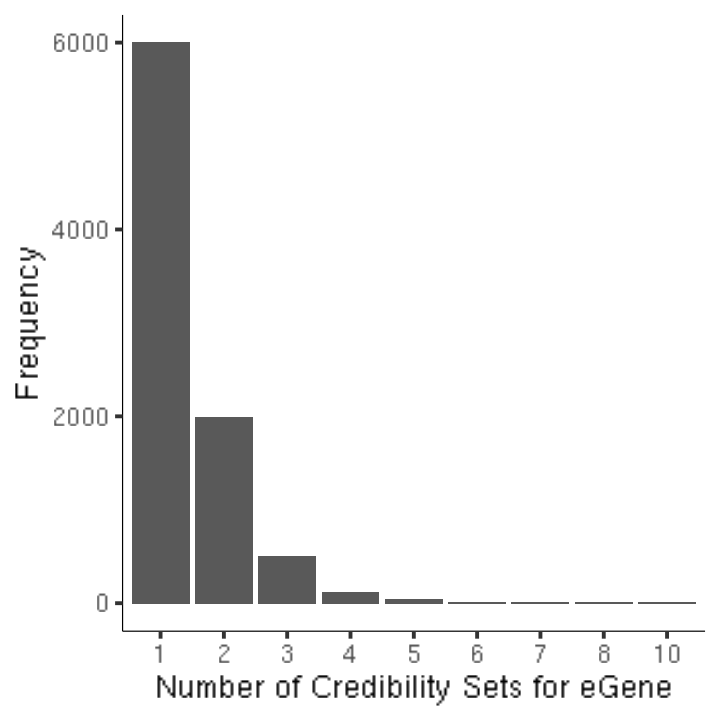

In [11]:
options(repr.plot.width=6, repr.plot.height=6)

susie.snps %>%
    dplyr::group_by(Gene) %>%
    dplyr::summarize(N.CS=length(unique(Credible_Set))) %>%
    dplyr::mutate(N.CS=factor(N.CS, levels=1:(max(N.CS)))) %>%
    ggplot() +
    geom_bar(aes(x=N.CS)) +
    xlab("Number of Credibility Sets for eGene") + ylab("Frequency") +
    ggplot_theme

ggsave("01_Colocalization/results/susie_number_of_credibility_sets.svg", width=6, height=6)

Some credibility intervals can get rather large. In this case, there are a few credibility sets that have an outsized number of SNPs, even when accounting for the number of SNPs present at the locus. I may want to check these regions for high LD.

In [32]:
locus.sizes <- cis.eqtl %>%
    dplyr::group_by(gene) %>%
    dplyr::summarize(N.SNPs=n())

cs.sizes <- susie.snps %>%
    dplyr::group_by(Gene, Credible_Set) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    merge(., locus.sizes, by.x="Gene", by.y="gene")

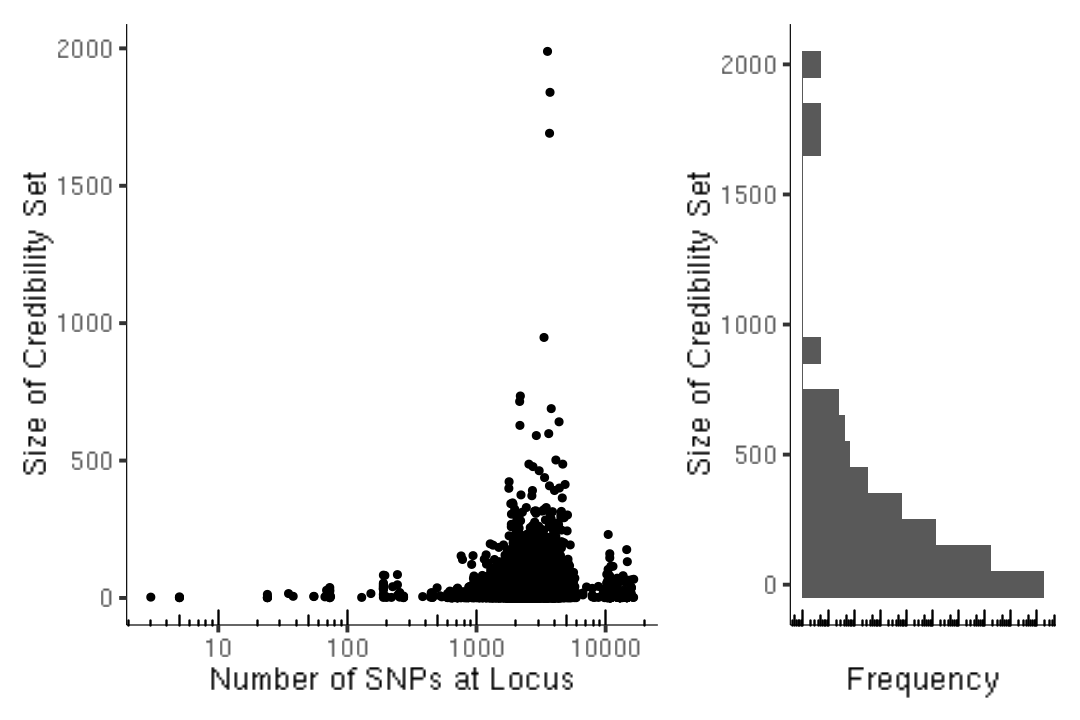

In [75]:
options(repr.plot.width=9, repr.plot.height=6)

p1 <- cs.sizes %>%
    ggplot(aes(x=N.SNPs, y=N)) +
    geom_point() + 
    scale_x_log10() + annotation_logticks(sides="b") +
    xlab("Number of SNPs at Locus") + ylab("Size of Credibility Set") +
    ggplot_theme

p2 <- cs.sizes %>%
    ggplot() +
    geom_histogram(aes(x=N), binwidth=100) +
    coord_flip() +
    scale_y_continuous(trans="log1p") + annotation_logticks(sides="b") +
    xlab("Size of Credibility Set") + ylab("Frequency") +
    ggplot_theme +
    theme(axis.ticks.x=element_blank(), axis.text.x=element_blank())

p1 + p2 + plot_layout(widths=c(2, 1))

## FINEMAP Credible Sets

All of the 10618 eGenes have at least one credibility set.

In [76]:
length(unique(finemap.snps$Gene))
length(unique(cis.eqtl.conditional$Gene))

[1] 10618

[1] 10618

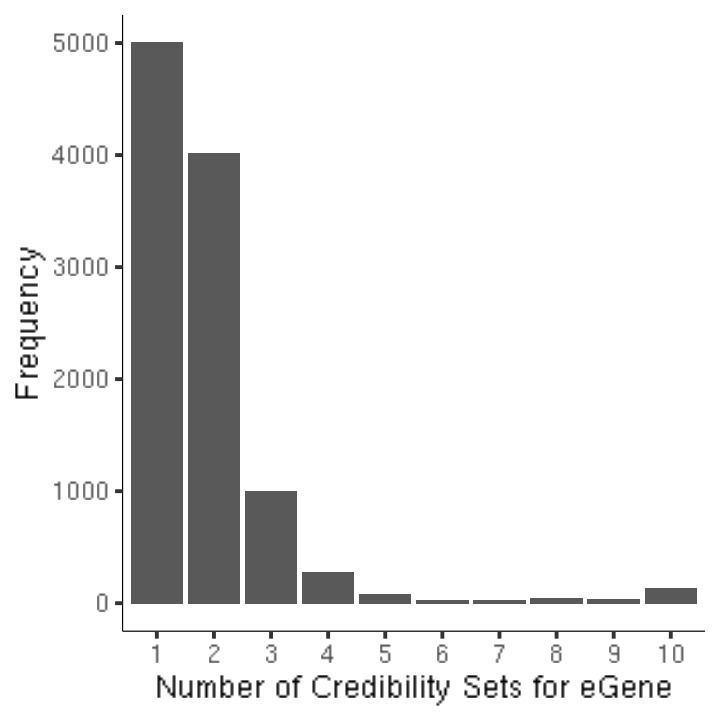

In [77]:
options(repr.plot.width=6, repr.plot.height=6)

finemap.snps %>%
    dplyr::select(Gene, k) %>%
    unique() %>%
    dplyr::mutate(k=factor(k, levels=1:(max(k)))) %>%
    ggplot() +
    geom_bar(aes(x=k)) +
    xlab("Number of Credibility Sets for eGene") + ylab("Frequency") +
    ggplot_theme

ggsave("01_Colocalization/results/finemap_number_of_credibility_sets.svg", width=6, height=6)

FINEMAP also reports statistics about the LD of SNPs within credibility sets.

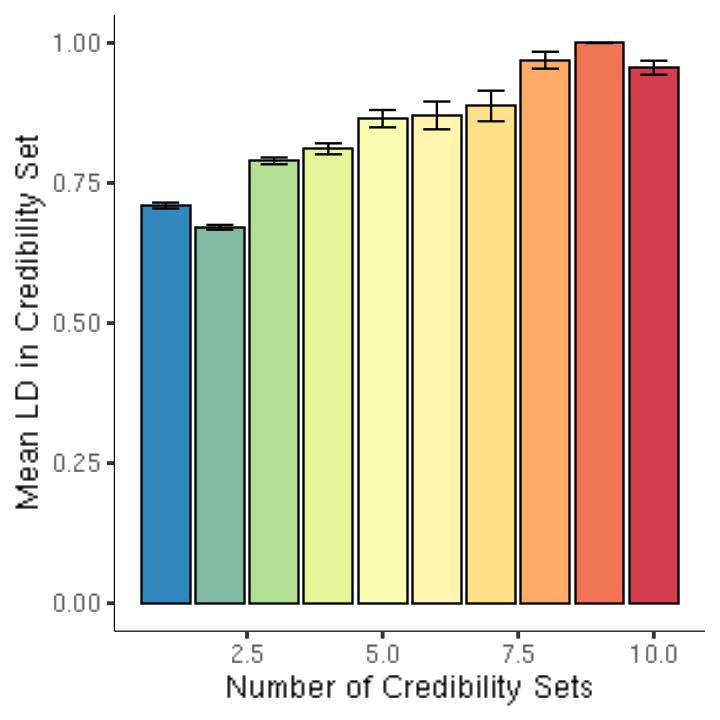

In [78]:
options(repr.plot.width=6, repr.plot.height=6)

finemap.snps %>%
    dplyr::select(Gene, k, Credibility_Set_Mean_LD) %>%
    unique() %>%
    ggplot(aes(x=k, y=Credibility_Set_Mean_LD, fill=k)) +
    stat_summary(geom="bar", fun=mean, position="dodge", color="black") +
    stat_summary(geom="errorbar", fun.data=mean_se, position="dodge", width=0.5) +
    xlab("Number of Credibility Sets") + ylab("Mean LD in Credibility Set") +
    guides(fill="none") +
    scale_fill_distiller(palette="Spectral") +
    ggplot_theme

ggsave("01_Colocalization/results/finemap_credibility_sets_mean_ld.svg", width=6, height=6)

Some credibility intervals can get rather large. In comparison to SuSiE, there is a clear relationship between the number of SNPs at a locus and the number of SNPs included in a credibility set. Some of the credibility sets seem to span the entire locus!

In [80]:
locus.sizes <- cis.eqtl %>%
    dplyr::group_by(gene) %>%
    dplyr::summarize(N.SNPs=n())

cs.sizes <- finemap.snps %>%
    dplyr::group_by(Gene, Credibility_Set) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    merge(., locus.sizes, by.x="Gene", by.y="gene")

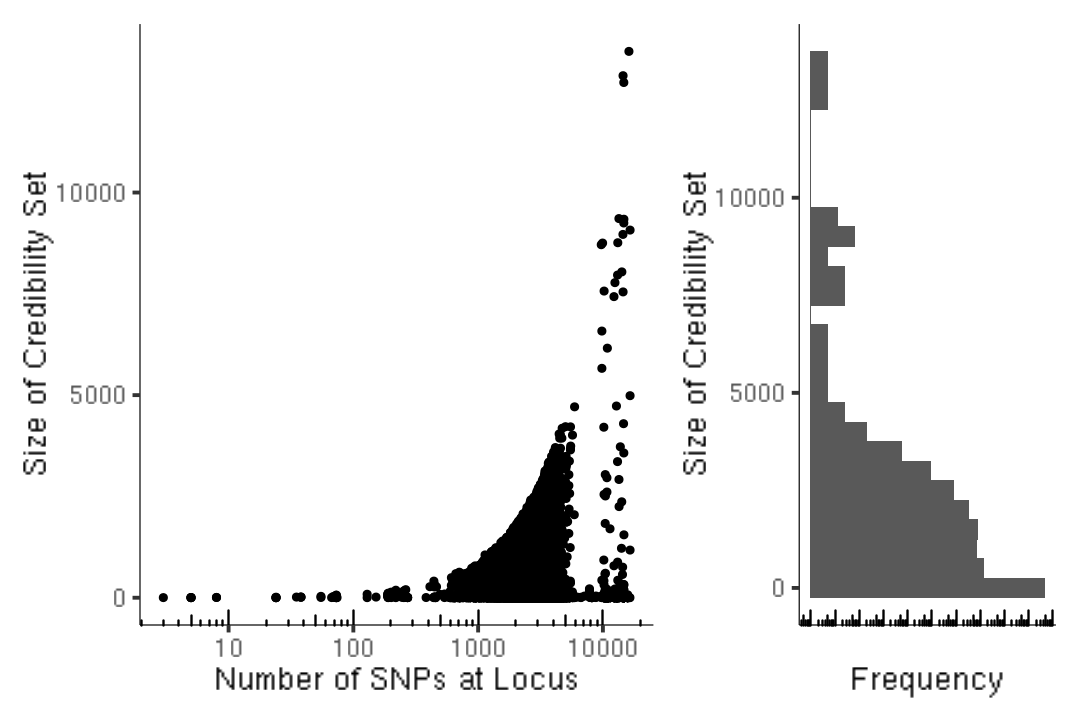

In [85]:
options(repr.plot.width=9, repr.plot.height=6)

p1 <- cs.sizes %>%
    ggplot(aes(x=N.SNPs, y=N)) +
    geom_point() + 
    scale_x_log10() + annotation_logticks(sides="b") +
    xlab("Number of SNPs at Locus") + ylab("Size of Credibility Set") +
    ggplot_theme

p2 <- cs.sizes %>%
    ggplot() +
    geom_histogram(aes(x=N), binwidth=500) +
    coord_flip() +
    scale_y_continuous(trans="log1p") + annotation_logticks(sides="b") +
    xlab("Size of Credibility Set") + ylab("Frequency") +
    ggplot_theme +
    theme(axis.ticks.x=element_blank(), axis.text.x=element_blank())

p1 + p2 + plot_layout(widths=c(2, 1))

## Sentinel SNPs from Conditional Analysis

I begin by making some very basic comparisons. First, I compare the distance in the number of signals captured by either the conditional analysis or the credibility sets. When the methods have the same number of signals, $|k_c - k_f| \leq 0$, where $k_c$ is the number of signals from the conditional analysis and $k_f$ is the number of signals from the credibility sets at a given eGene.

### SuSiE

Around 80% of eGenes have the same number of signals. As we increase the neighborhood, the number of eGenes quickly reaches saturation. For instance, 97% of eGenes are $|k_c - k_f| \leq 1$. That is, 97% of eGenes agree with the number of signals from both methods with an error of one signal.

In [15]:
k.comparison <- merge(
    cis.eqtl.conditional %>%
        dplyr::group_by(Gene) %>%
        dplyr::summarize(Conditional.K=n()),
    susie.snps %>%
        dplyr::group_by(Gene) %>%
        dplyr::summarize(SuSiE.K=length(unique(Credible_Set))),
    by="Gene"
)

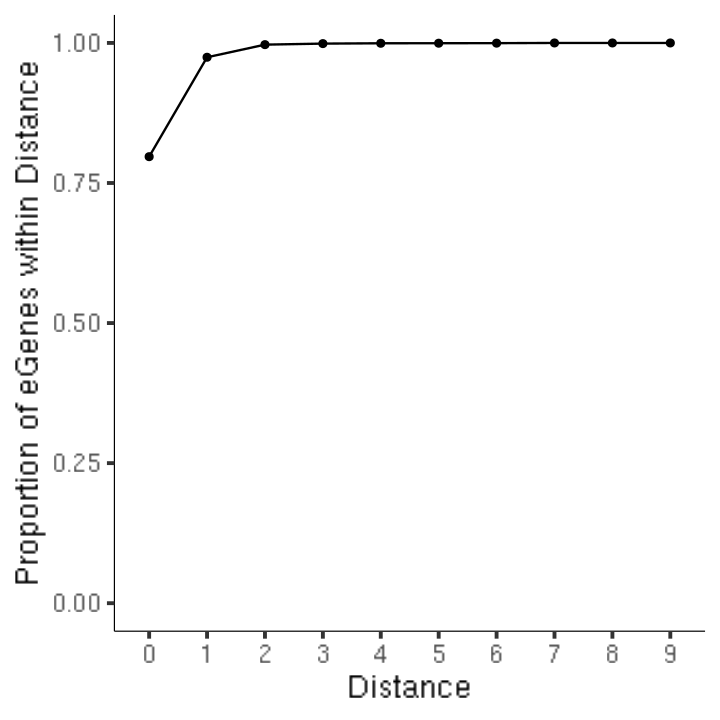

In [16]:
proportions <- sapply(0:9, function(threshold) {
    sum(abs(k.comparison$Conditional.K - k.comparison$SuSiE.K) <= threshold) / nrow(k.comparison)
})

options(repr.plot.width=6, repr.plot.height=6)

data.frame(
    Distance=factor(0:9),
    Proportion=proportions
) %>%
    ggplot(aes(x=Distance, y=Proportion, group=1)) +
    geom_point() +
    geom_line() +
    ylim(0, 1) +
    xlab("Distance") + ylab("Proportion of eGenes within Distance") +
    ggplot_theme

ggsave("01_Colocalization/results/conditional_susie_comparison.svg", width=6, height=6)

I also plotted the density of the agreement between the signals detected by the two methods. SuSiE tends to identify fewer signals than the conditional analysis.

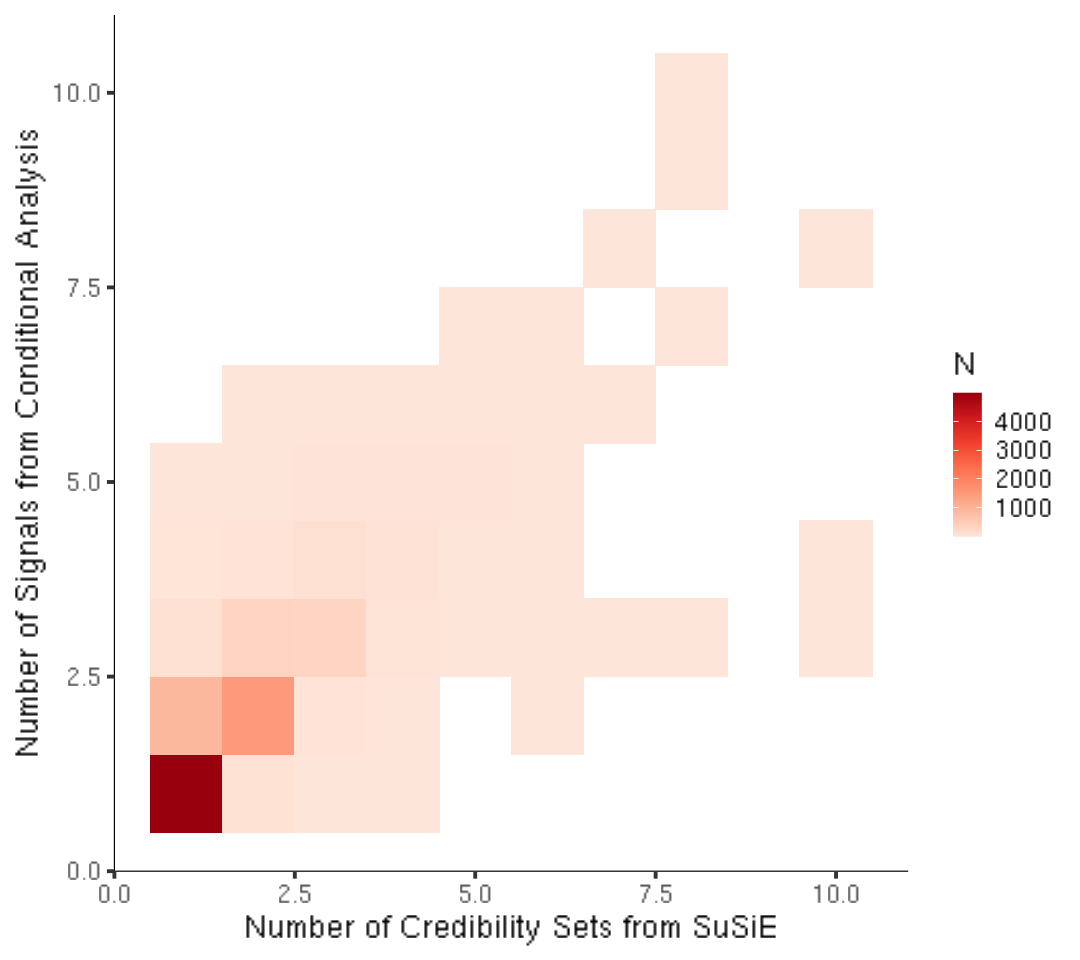

In [17]:
options(repr.plot.width=9, repr.plot.height=8)

k.comparison %>%
    dplyr::group_by(Conditional.K, SuSiE.K) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    ggplot(aes(x=SuSiE.K, y=Conditional.K, fill=N)) +
    geom_tile() +
    xlab("Number of Credibility Sets from SuSiE") + ylab("Number of Signals from Conditional Analysis") +
    scale_fill_distiller(palette="Reds", direction=1) +
    ggplot_theme + theme(legend.position="right")

ggsave("01_Colocalization/results/conditional_susie_density.svg", width=9, height=8)

Another simple measure is to ask how many conditional eSNPs fall within a credibility set. 70% of eSNPs from the conditional analysis are covered by a SuSiE credibility set from the same locus.

In [18]:
eGenes.with.CS.mask <- paste0(cis.eqtl.conditional$Gene, "-", cis.eqtl.conditional$SNP) %in% paste0(susie.snps$Gene, "-", susie.snps$SNP)
sum(eGenes.with.CS.mask) / nrow(cis.eqtl.conditional)

[1] 0.695403

### FINEMAP

Around 72% of eGenes have the same number of signals. As we increase the neighborhood, the number of eGenes quickly reaches saturation. For instance, 96% of eGenes are $|k_c - k_f| \leq 1$. That is, 96% of eGenes agree with the number of signals from both methods with an error of one signal.

In [19]:
k.comparison <- merge(
    cis.eqtl.conditional %>%
        dplyr::group_by(Gene) %>%
        dplyr::summarize(Conditional.K=n()),
    finemap.snps %>%
        dplyr::select(Gene, FINEMAP.K=k) %>%
        unique(),
    by="Gene"
)

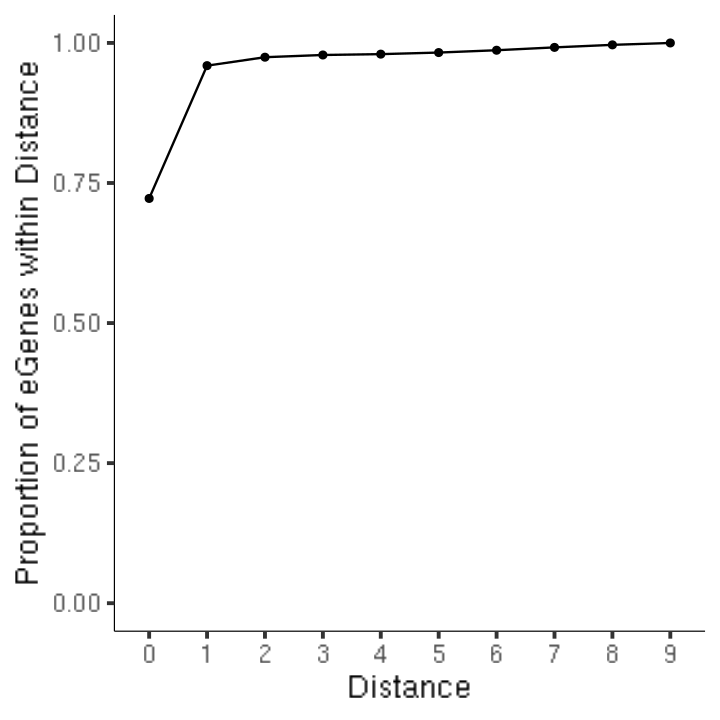

In [20]:
proportions <- sapply(0:9, function(threshold) {
    sum(abs(k.comparison$Conditional.K - k.comparison$FINEMAP.K) <= threshold) / nrow(k.comparison)
})

options(repr.plot.width=6, repr.plot.height=6)

data.frame(
    Distance=factor(0:9),
    Proportion=proportions
) %>%
    ggplot(aes(x=Distance, y=Proportion, group=1)) +
    geom_point() +
    geom_line() +
    ylim(0, 1) +
    xlab("Distance") + ylab("Proportion of eGenes within Distance") +
    ggplot_theme

ggsave("01_Colocalization/results/conditional_finemap_comparison.svg", width=6, height=6)

I also plotted the density of the agreement between the signals detected by the two methods. FINEMAP tends to identify more signals than the conditional analysis.

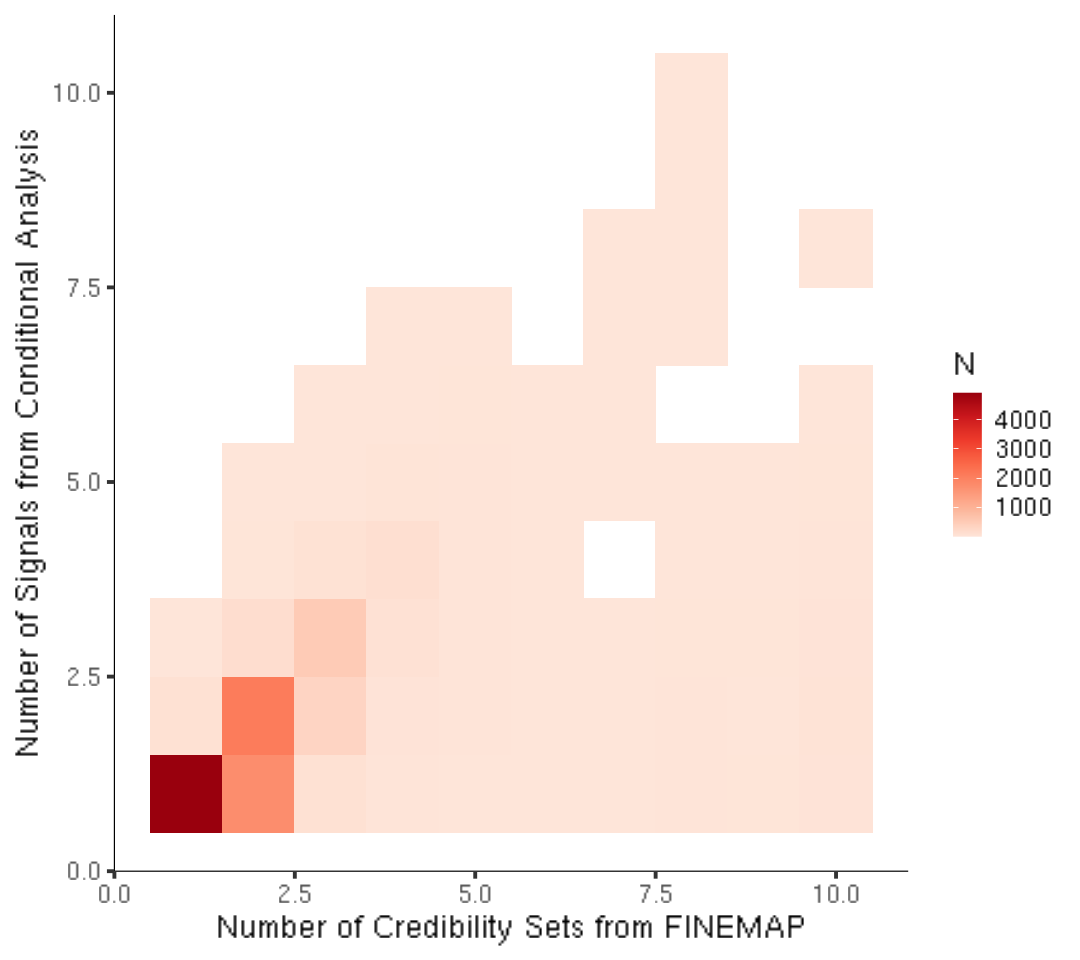

In [22]:
options(repr.plot.width=9, repr.plot.height=8)

k.comparison %>%
    dplyr::group_by(Conditional.K, FINEMAP.K) %>%
    dplyr::summarize(N=n(), .groups="drop") %>%
    ggplot(aes(x=FINEMAP.K, y=Conditional.K, fill=N)) +
    geom_tile() +
    xlab("Number of Credibility Sets from FINEMAP") + ylab("Number of Signals from Conditional Analysis") +
    scale_fill_distiller(palette="Reds", direction=1) +
    ggplot_theme + theme(legend.position="right")

ggsave("01_Colocalization/results/conditional_finemap_density.svg", width=9, height=8)

Another simple measure is to ask how many conditional eSNPs fall within a credibility set. 91% of eSNPs from the conditional analysis are covered by a FINEMAP credibility set from the same locus.

In [23]:
eGenes.with.CS.mask <- paste0(cis.eqtl.conditional$Gene, "-", cis.eqtl.conditional$SNP) %in% paste0(finemap.snps$Gene, "-", finemap.snps$SNP)
sum(eGenes.with.CS.mask) / nrow(cis.eqtl.conditional)

[1] 0.9129812